In [1]:
import pandas as pd
import numpy as np
#import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 9.0) # set default size of plots

np.random.seed(1)

In [2]:
###  Modelo para Regressão Com backpropagation

def layer_sizes2(X, Y, n_h=4):
    """
    Argumentos:
    X -- shape do input (quantidade de features, quantidade de exemplos)
    Y -- shape do target (1, quantidade de exemplos)
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

def initialize_parameters2(n_x, n_h, n_y):
    """
    Argument:
    n_x -- tamanho da camada de entrada
    n_h -- tamanho da camada escondida
    n_y -- tamanho da camada de saída
    
    Retorna:
    params -- dicionário com os parâmetros (pesos) iniciais do modelo:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    
    np.random.seed(2) # garantir a reprodução do código
    
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

def forward_propagation2(X, parameters):
    """
    Argumentos:
    X -- input de tamanho (n_x, m)
    parametros -- python dicionário contendo os parâmetros (saída da função de inicialização dos parametros)
    
    Retorna:
    A2 -- A saída da função sigmoidal ou tangente hiberbólica ou relu
    cache -- dicionário contendo "Z1", "A1", "Z2" e "A2"
    """

    # Recupere cada parâmetro do dicionário parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Implementando a Forward Propagation para calcular A1 tanh e A2 linear
    Z1 = np.dot(W1,X) + b1
    #A1 = np.tanh(Z1)
    A1 = Z1 # linear
    Z2 = np.dot(W2, A1) + b2
    A2 = 1.7159*np.tanh(2/3 * Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache


def compute_cost2(A2, Y, parameters):
    """
    Computa o custo dado os argumentos
    
    Arguments:
    A2 -- Saída linear da segunda ativação de shape (1, qtd de exemplos)
    Y -- Valor verdadeiro do rótulo de shape (1, qtd de exemplos)
    parameters -- dicionário contendo os parâmetros W1, b1, W2 and b2
    
    Retorna:
    cost
    
    """
    
    m = Y.shape[1] # quantidade de exemplos

    # Computa o custo (cost)
    err = A2 - Y
    cost = 1/m * np.sum(err**2)
    
    cost = float(np.squeeze(cost))  # garanta que o custo tem a dimensão esperada
    assert(isinstance(cost, float))
    
    return cost

def backward_propagation2(parameters, cache, X, Y):
    """
    Implementa a retropropagação 
    
    Argumentos:
    parameters -- dicionário contendo os parâmetros
    cache -- dicionário contendo "Z1", "A1", "Z2" and "A2".
    X -- input de shape (qtd de features, qtd de examplos)
    Y -- valor verdadeiro do rótulo de shape (1, qtd de examplos)
    
    Retorna:
    grads -- dicionário contendo os gradientes em relação aos diferentes parâmetros
    """
    m = X.shape[1]
    
    # Primeiro, recuperamos W1 e W2 do dicinário "parameters"
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    # Recuperamos também A1 e A2 do dicionário "cache".
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Retropropagação: calcula-se dW1, db1, dW2, db2.
    dZ2 = (A2 - Y)*(1.14393 - A2/1.5)
    dW2 = 1/m * np.dot(dZ2,A1.T)
    db2 = 1/m * np.sum(dZ2, axis = 1, keepdims=True)
    #dZ1 = np.dot(W2.T, dZ2) * (1-np.power(A1, 2))
    dZ1 = np.dot(W2.T, dZ2) * A1
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis = 1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

def update_parameters2(parameters, grads, learning_rate = 1.2):
    """
    Atualiza os parâmetros utilizando o gradient descendente 
    
    Argumentos:
    parameters -- dicionário contendo os parâmetros
    grads -- dicionário contendo os gradientes
    
    Retorna:
    parameters -- dicionário contendo os parâmetros atualizados
    """
    # Recupera-se cada parâmetro do dicionário "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Recupera-se cada gradiente do dicionário "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    # Regra de atualização para cada parâmetro
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

def nn_model2(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Argumentos:
    X -- dataset de shape (2, qtd de examplos)
    Y -- labels de shape (1, qtd de examplos)
    n_h -- tamanho da camada escondida
    num_iterations -- quantidade de iterações do gradiente descendente
    print_cost -- se True, mostra o custo a cada 1000 iterações
    
    Retorna:
    parameters -- parâmetros aprendidos pelo modelo. Eles podem ser utilizados para fazer previsões (predict).
    """
    
    np.random.seed(3)
    n_x = layer_sizes2(X, Y)[0]
    n_y = layer_sizes2(X, Y)[2]
    
    # Inicialização dos parâmetros
    parameters = initialize_parameters2(n_x, n_h, n_y)

    # Gradiente descendente (loop)
    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation2(X, parameters)
        
        # Função de custo. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost2(A2, Y, parameters)
 
        # Retropropagação (Backpropagation). Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation2(parameters, cache, X, Y)
 
        # Atualização dos parâmetros pelo gradiente descendente. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters2(parameters, grads, learning_rate=1.2)
        
        # Print o custo (cost) a cada 1000 iterações
        if print_cost and i % 1000 == 0:
            print ("Custo após iteração %i: %f" %(i, cost))

    return parameters

def predict2(parameters, X):
    """
    Utiliza os parâmetros aprendidos para prever o valor da saída para cada exemplo X 
    
    Argumentos:
    parameters -- dicionário contendo os parâmetros
    X -- input de tamanho (n_x, m)
    
    Retorna
    predictions -- vetor de valores previstos do modelo treinado
    """
    
    A2, cache = forward_propagation2(X, parameters)
    predictions = A2
    
    return predictions

In [3]:
#### Resilient Backpropagation RProp ####

def rprop_update(parameter, grad_old, grad_new, step_size,learning_rate_max, learning_rate_min):
    
    n_i = parameter.shape[0]
    n_j = parameter.shape[1]

    for i in range(n_i):

        for j in range(n_j):

            if grad_old[i, j] * grad_new[i, j] > 0:
                step_size[i, j] = min(step_size[i,j] * learning_rate_max, step_size.max())
                grad_new[i, j] = - np.sign(grad_new[i, j]) * step_size[i, j]
                parameter[i, j] = parameter[i, j] + grad_new[i, j]
            
            elif grad_old[i, j] * grad_new[i, j] < 0:
                step_size[i, j] = max(step_size[i,j] * learning_rate_min, step_size.min())
                grad_new[i, j] = 0
            
            else: 
                grad_new[i, j] = - np.sign(grad_new[i, j]) * step_size[i, j]
                parameter[i, j] = parameter[i, j] + grad_new[i, j]

    return parameter, grad_new, step_size
    

def update_parameters_rprop2(parameters, grads_old, grads_new, step_size,learning_rate_max = 1.2, learning_rate_min = 0.5):
    """
    Atualiza os parâmetros utilizando o Resilient backpropagation
    
    Argumentos:
    parameters -- dicionário contendo os parâmetros
    grads -- dicionário contendo os gradientes
    
    Retorna:
    parameters -- dicionário contendo os parâmetros atualizados
    """
    # Recupera-se cada parâmetro do dicionário "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Recupera-se cada gradiente do dicionário "grads_old" e "grads_new"
    dW1_old = grads_old['dW1']
    db1_old = grads_old['db1']
    dW2_old = grads_old['dW2']
    db2_old = grads_old['db2']

    dW1_new = grads_new['dW1']
    db1_new = grads_new['db1']
    dW2_new = grads_new['dW2']
    db2_new = grads_new['db2']

    W1_step = step_size['W1']
    b1_step = step_size['b1']
    W2_step = step_size['W2']
    b2_step = step_size['b2']


    W1, dW1_new, W1_step = rprop_update(W1, dW1_old, dW1_new, W1_step, learning_rate_max, learning_rate_min)
    b1, db1_new, b1_step = rprop_update(b1,db1_old, db1_new, b1_step, learning_rate_max, learning_rate_min) 
    W2, dW2_new, W2_step = rprop_update(W2,dW2_old, dW2_new, W2_step, learning_rate_max, learning_rate_min)
    b2, db2_new, b2_step = rprop_update(b2,db2_old, db2_new, b2_step, learning_rate_max, learning_rate_min)

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    grads = {"dW1": dW1_new,
             "db1": db1_new,
             "dW2": dW2_new,
             "db2": db2_new}

    step_size = {"W1": W1_step,
                 "b1": b1_step,
                 "W2": W2_step,
                 "b2": b2_step}

    return parameters, grads, step_size

def nn_model_rprop(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Argumentos:
    X -- dataset de shape (2, qtd de examplos)
    Y -- labels de shape (1, qtd de examplos)
    n_h -- tamanho da camada escondida
    num_iterations -- quantidade de iterações do gradiente descendente
    print_cost -- se True, mostra o custo a cada 1000 iterações
    
    Retorna:
    parameters -- parâmetros aprendidos pelo modelo. Eles podem ser utilizados para fazer previsões (predict).
    """
    
    np.random.seed(3)
    n_x = layer_sizes2(X, Y)[0]
    n_y = layer_sizes2(X, Y)[2]
    
    # Inicialização dos parâmetros
    parameters = initialize_parameters2(n_x, n_h, n_y)
    
    # Gradiente descendente (loop)
    grads_old = {"dW1": np.zeros((n_h, n_x)),
                 "db1": np.zeros((n_h, 1)),
                 "dW2": np.zeros((n_y, n_h)),
                 "db2": np.zeros((n_y, 1))}

    step_size = {"W1": np.random.rand(n_h, n_x),
                "b1": np.random.rand(n_h, 1),
                "W2": np.random.rand(n_y, n_h),
                "b2": np.random.rand(n_y, 1)}

    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation2(X, parameters)
        
        # Função de custo. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost2(A2, Y, parameters)
 
        # Retropropagação (Backpropagation). Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads_new = backward_propagation2(parameters, cache, X, Y)
 
        # Atualização dos parâmetros pelo gradiente descendente. Inputs: "parameters, grads". Outputs: "parameters".
        parameters, grads_old, step_size = update_parameters_rprop2(parameters, grads_old, grads_new, step_size, learning_rate_max=1.2, learning_rate_min=0.5)

        # Print o custo (cost) a cada 1000 iterações
        if print_cost and i % 1000 == 0:
            print ("Custo após iteração %i: %f" %(i, cost))

    return parameters


In [4]:
## Teste com a série dow jones

In [5]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import pandas_datareader.data as web
from datetime import datetime

In [6]:
df = web.DataReader('^DJI', 'stooq', start='2019-09-10', end='2019-10-09')
df.reset_index(inplace = True)

ConnectionError: HTTPSConnectionPool(host='stooq.com', port=443): Max retries exceeded with url: /q/d/l/?s=%5EDJI&i=d&d1=20150801&d2=20200730 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fc549b78f50>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [ ]:
df

In [ ]:
df = df.drop(['Date'],axis=1) # Drop Date feature
df = df.dropna(inplace=False)  # Remove all nan entries.

df = df.drop(['Volume'],axis=1) # Drop Adj close and volume feature
df_train = df[:1059]    # 60% training data and 40% testing data
df_test = df[1059:]
scaler = MinMaxScaler() # For normalizing dataset

In [ ]:
# We want to predict Close value of stock 
X_train = scaler.fit_transform(df_train.drop(['Close'],axis=1))
y_train = scaler.fit_transform(df_train['Close'].values.reshape(-1,1))

# y is output and x is features.
X_test = scaler.fit_transform(df_test.drop(['Close'],axis=1))
y_test = scaler.fit_transform(df_test['Close'].values.reshape(-1,1))

In [ ]:
def denormalize(df,norm_data):
    df = df['Close'].values.reshape(-1,1)
    norm_data = norm_data.reshape(-1,1)
    scl = MinMaxScaler()
    a = scl.fit_transform(df)
    new = scl.inverse_transform(norm_data)
    return new


In [ ]:
parameters = nn_model_rprop(X_train.T, y_train.T, n_h=4, print_cost=True)

In [ ]:
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

In [35]:
pred_treino = predict2(parameters, X_train.T)
mse_treino = ((pred_treino - y_train.T)**2).mean()

# Predictions para teste
predictions = predict2(parameters, X_test.T)
mse_teste = ((predictions - y_test.T)**2).mean()

print('Erro de Treinamento = ' + str(mse_treino))
print('Erro de Teste = ' + str(mse_teste)) 

Erro de Treinamento = 0.4103814403096402
Erro de Teste = 0.3519854819833478


In [36]:
pred = denormalize(df_test, predictions.T)

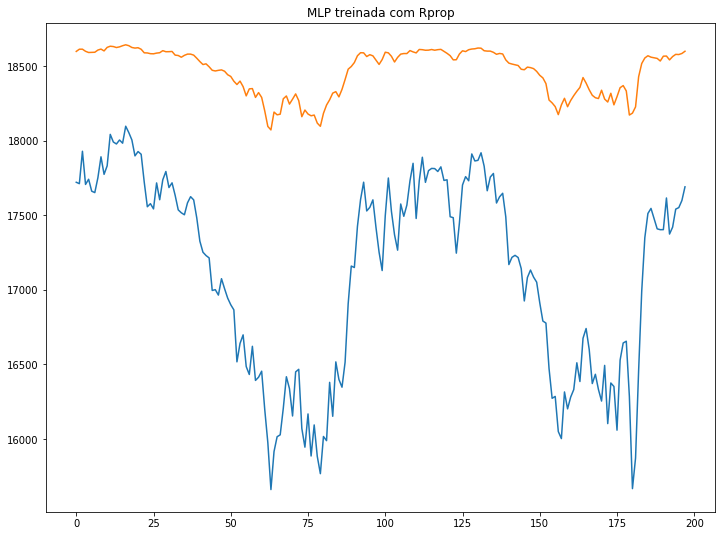

In [37]:
plt.plot(range(y_test.shape[0]),df_test['Close'])
plt.plot(range(y_test.shape[0]),pred)
plt.title('MLP treinada com Rprop');

In [38]:
# Teste com Backpropagation
parameters = nn_model2(X_train.T, y_train.T, n_h = 4, print_cost = True)

Custo após iteração 0: 0.338544
Custo após iteração 1000: 0.000193
Custo após iteração 2000: 0.000179
Custo após iteração 3000: 0.000200
Custo após iteração 4000: 0.000238
Custo após iteração 5000: 0.000264
Custo após iteração 6000: 0.000206
Custo após iteração 7000: 0.000178
Custo após iteração 8000: 0.000190
Custo após iteração 9000: 0.000190


In [39]:
pred_treino = predict2(parameters, X_train.T)
mse_treino = ((pred_treino - y_train.T)**2).mean()

# Predictions para teste
predictions = predict2(parameters, X_test.T)
mse_teste = ((predictions - y_test.T)**2).mean()

print('Erro de Treinamento = ' + str(mse_treino))
print('Erro de Teste = ' + str(mse_teste)) 

Erro de Treinamento = 0.00017414271555751663
Erro de Teste = 0.0015352454847203543


In [40]:
pred = denormalize(df_test, predictions.T)

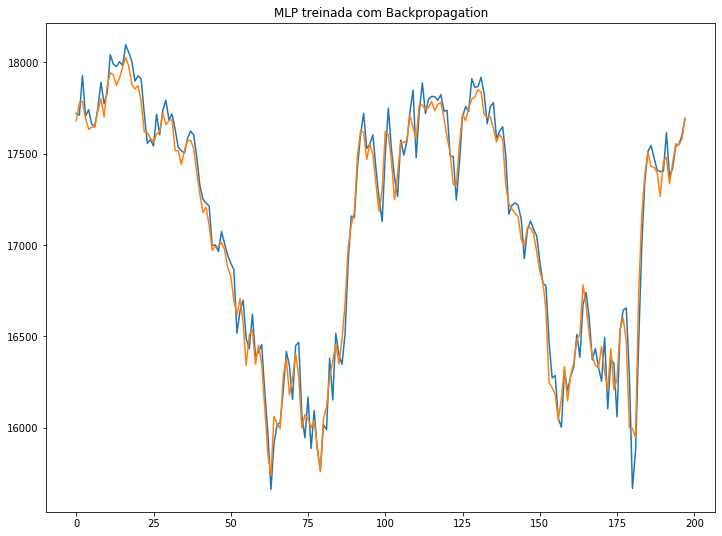

In [41]:
plt.plot(range(y_test.shape[0]),df_test['Close'])
plt.plot(range(y_test.shape[0]),pred)
plt.title('MLP treinada com Backpropagation');

In [42]:
### Funçao do PSO ajustado para o problema de Redes Neurais

# def PSO(X, parameters, parameter, fun, best_cost,Y, qtd_particulas, atributos_dim, parameter_dim, min_i, max_i, seed = np.random.seed(1), max_epoch=1000, w=0.8, c1=1.4960, c2=1.4960):
#     '''
#         Função do Algoritmo SWARM PSO. 
#         Inputs:
#         - fun_opt: Função de fitness a ser otimizada
#         - qtd_particulas: Quantidade de partículas
#         - atributos_dim: Dimensão do Vetor de atributos 
#         - min: intervalo inferior do domínio da função  
#         - max: intervalo superior do domínio da função
#         - seed: por padrão np.random.seed(1)
#         - w: inércia 
#         - c1: influência do pbest (termo cognitivo)
#         - c2: influência do gbest (termo do aprendizado social)
#     '''
    
#     # inicializar as partículas em posições aleatórias
#     particulas = np.random.uniform(low = min_i, high = max_i, size = (qtd_particulas, atributos_dim))
#     #print('Partículas: \n', particulas)

#     # inicializar a velocidade
#     velocidade = np.zeros((qtd_particulas, atributos_dim))

#     # inicializar o pbest em zero
#     pbest = np.zeros((qtd_particulas,atributos_dim))

#     gbest_value = best_cost
#     gbest = 0
#     particulas[gbest,:] = parameters[parameter].reshape(1, atributos_dim)

#     parameters_pbest = parameters.copy()
#     parameters_gbest = parameters.copy()

#     # Extrair a posição do gbest 
#     for z in np.arange(qtd_particulas):
#         A2 = predict2(parameters, X)
#         parameters[parameter] = particulas[z,:].reshape(parameter_dim)
#         new_gbest_value = fun(A2, Y, parameters)
#         if new_gbest_value < gbest_value:
#             gbest_value = new_gbest_value
#             gbest = z
            
    
#     #if gbest != 0:
#     #    gbest_value = particulas[gbest,:]

#     for k in np.arange(max_epoch):
#     #for k in np.arange(max_epoch):    
#         #print('epoch n.:', k)
#         #print('\n')
#     # Iterar para atualizar o pbest e gbest para cada partrícula
#         for j in np.arange(qtd_particulas):
            
#             parameters[parameter] = particulas[j,:].reshape(parameter_dim)
#             parameters_pbest[parameter] = pbest[j,:].reshape(parameter_dim)

#             A2 = predict2(parameters, X)
#             A2_pbest = predict2(parameters_pbest, X)

#             if fun(A2, Y, parameters) < fun(A2_pbest, Y, parameters_pbest):
#                 pbest[j,:] = particulas[j,:]

#                 #parameters[parameter] = particulas[j,:].reshape(parameter_dim)
#             parameters_pbest[parameter] = pbest[j,:].reshape(parameter_dim)
#             parameters_gbest[parameter] = particulas[gbest, :].reshape(parameter_dim)

#                 #A2 = predict2(parameters, X)
#             #A2_gbest = predict2(parameters_gbest, X)

#             if fun(A2, X, parameters) < gbest_value
#             #fun(A2_gbest, Y, parameters_gbest):
#                 gbest = j
                    
#                 parameters_gbest[parameter] = particulas[gbest, :].reshape(parameter_dim)
#                 A2_gbest = predict2(parameters_gbest, X)

#                 gbest_value = fun(A2_gbest, Y, parameters_gbest)
                
#             # Iteração para atualizar as posições das partículas
#         for i in np.arange(qtd_particulas):
#             r1, r2 = np.random.rand(), np.random.rand()
#             velocidade[i, :] = w * velocidade[i, :] + c1 * r1 * (pbest[i, :] - particulas[i, :]) + c2 * r2 * (particulas[gbest, :] - particulas[i, :])
#             particulas[i, :] = particulas[i, :] + velocidade[i, :]
#                 # garantindo particulas dentro dos intervalos
#                 # for dim in np.arange(atributos_dim):
#                 #     if particulas[i, dim] < min_i:
#                 #         particulas[i, dim] = min_i
#                 #     elif particulas[i, dim] > max_i:
#                 #         particulas[i, dim] = max_i
                        
        
        
#     return parameters_gbest[parameter], gbest_value

In [43]:
### MLP com PSO  

# def update_parameters_pso(X, parameters, compute_cost2, Y, best_cost):
#     '''
#     Argumentos:
#     parameters - dicionário contendo os parâmetros do modelo
#     compute_cost2 - função a ser minimizada, neste caso a função de custo
#     A2 - previsão feita pelo modelo
#     Y - rótulo 

#     Retorna:
#     parameters - parâmetros atualizados a partir do PSO
#     '''

#     W1 = parameters['W1']
#     b1 = parameters['b1']
#     W2 = parameters['W2']
#     b2 = parameters['b2']
    
#     W1_dim = np.array(W1.shape).prod()
#     b1_dim = np.array(b1.shape).prod()
#     W2_dim = np.array(W2.shape).prod()
#     b2_dim = np.array(b2.shape).prod()

#     W2, best_cost = PSO(X = X, parameters = parameters, parameter = 'W2', fun = compute_cost2, best_cost = best_cost,Y = Y, qtd_particulas = 50, atributos_dim = W2_dim, parameter_dim = W2.shape,min_i=-2, max_i=2)
#     parameters['W2'] = W2

#     print('Erro após otimizar W2 = ' + str(best_cost))

#     b2, best_cost = PSO(X = X, parameters = parameters, parameter = 'b2',fun = compute_cost2, best_cost = best_cost,Y = Y, qtd_particulas = 50, atributos_dim = b2_dim, parameter_dim = b2.shape,min_i=-2, max_i=2)
#     parameters['b2'] = b2

#     print('Erro após otimizar b2 = ' + str(best_cost))

#     W1, best_cost = PSO(X = X, parameters = parameters, parameter = 'W1',fun =compute_cost2, best_cost = best_cost,Y = Y, qtd_particulas = 50, atributos_dim = W1_dim, parameter_dim = W1.shape, min_i=-2, max_i=2)
#     parameters['W1'] = W1

#     print('Erro após otimizar W1 = ' + str(best_cost))

#     b1, best_cost = PSO(X = X, parameters = parameters, parameter = 'b1',fun = compute_cost2, best_cost = best_cost, Y = Y, qtd_particulas = 50, atributos_dim = b1_dim, parameter_dim = b1.shape, min_i=-2, max_i=2)
#     parameters['b1'] = b1

#     print('Erro após otimizar b1 = ' + str(best_cost))

#     return parameters

# def nn_model_pso(X, Y, n_h, num_iterations = 1, print_cost=False):
#     """
#     Argumentos:
#     X -- dataset de shape (2, qtd de exemplos)
#     Y -- labels de shape (1, qtd de exemplos)
#     n_h -- tamanho da camada escondida
#     num_iterations -- quantidade de iterações do gradiente descendente
#     print_cost -- se True, mostra o custo a cada 1000 iterações
    
#     Retorna:
#     parameters -- parâmetros aprendidos pelo pso. Eles podem ser utilizados para fazer previsões (predict).
#     """
    
#     np.random.seed(3)
#     n_x = layer_sizes2(X, Y)[0]
#     n_y = layer_sizes2(X, Y)[2]
    
#     # Inicialização dos parâmetros
#     parameters = initialize_parameters2(n_x, n_h, n_y)
    
#     parameters_best = parameters.copy()
    
#     A2, _ = forward_propagation2(X, parameters)

#     best_cost = compute_cost2(A2, Y, parameters)

#     for i in range(0, num_iterations):
 
#         # Atualização dos parâmetros pelo gradiente descendente. Inputs: "parameters, compute_cost2, A2, Y". Outputs: "parameters".
#         parameters = update_parameters_pso(X, parameters, compute_cost2, Y, best_cost)

#         # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
#         A2, _ = forward_propagation2(X, parameters)

#         # Função de custo. Inputs: "A2, Y, parameters". Outputs: "cost".
#         cost_new = compute_cost2(A2, Y, parameters)

#         # Avaliar se a nova busca melhorou
#         if cost_new < best_cost:
#             parameters_best = parameters
#             best_cost = cost_new

#         # Print o custo (cost) a cada 5 iterações
#         if print_cost and i % 2 == 0:
#             print ("Custo após iteração %i: %f" %(i, cost_new))
    
#     return parameters_best, best_cost


In [13]:
#### Tentativa de criar algoritmo PSO para otimizar todos os pesos de uma só vez

### Estruturando os dados de dicionário para numpy array e de numpy array para dicionário
def parameter_dim_tot(parameter):
    '''
    Argumentos:
    parameter - array de parâmetros

    Retorna:
    dim_tot - dimensão total dos parâmetris 
    '''
    dim_tot = np.array(parameter.shape).prod()

    return dim_tot

def parameter_reshape_coluna(parameter):
    '''
    Argumentos:
    parameter - array de parâmetros

    Retorna:
    parameter_reshaped - array coluna dos parâmetros
    '''
    param_dim_tot = parameter_dim_tot(parameter)
    parameter_reshaped = parameter.reshape(1, param_dim_tot)

    return parameter_reshaped

def parameters_stack(parameters):
    '''
    Argumentos: 
    parameters - lista com os parâmetros em array 

    Retorna:
    parametros_stack - array coluna com parâmetros empilhados
    '''
    params_list = []
    param_temp = 0
    
    for param in parameters:
        param_temp = parameter_reshape_coluna(param)
        params_list.append(param_temp)
    
    params_stack = np.concatenate(tuple(params_list), axis = 1)

    return params_stack

# Unstack os parâmetros com base na dimensão dos atributos (matrizes de pesos)
def parameters_unstack(parameters_stack, atributos_dim):
    '''
    Argumentos:
    parameters_stack - array dos parâmetros no formato empilhado por colunas para trabalhar no PSO
    atributos_dim - lista com dimensão total dos atributos 

    Retorna:
    params - lista com parâmetros no formato de lista
    '''
    params = []
    i = atributos_dim[0]
    params.append(parameters_stack[:, :i])

    for dim in atributos_dim[1:]:
        params.append(parameters_stack[:, i:i+dim])
        i += dim

    return params

# Reshape para o formato do dicionário (parameters)
def parameters_reshape_dictionary(parameters_dict, parameters_unstacked):
    '''
    Argumentos:
    parameters_dict - dicionário com parâmetros
    parameters_unstacked - parâmetros no formato array 

    retorna:
    parameters_reshaped - lista com os parâmetros formatados para o dicionário 'parameters'
    '''
    w1_shape = parameters_dict['W1'].shape
    b1_shape = parameters_dict['b1'].shape
    w2_shape = parameters_dict['W2'].shape
    b2_shape = parameters_dict['b2'].shape

    parameters_reshaped = parameters_dict.copy()

    w1_reshaped = parameters_unstacked[0].reshape(w1_shape)
    b1_reshaped = parameters_unstacked[1].reshape(b1_shape)
    w2_reshaped = parameters_unstacked[2].reshape(w2_shape)
    b2_reshaped = parameters_unstacked[3].reshape(b2_shape)

    parameters_reshaped['W1'] = w1_reshaped
    parameters_reshaped['b1'] = b1_reshaped
    parameters_reshaped['W2'] = w2_reshaped
    parameters_reshaped['b2'] = b2_reshaped

    return parameters_reshaped

In [14]:
#### PSO para otimizar todos os parâmetros de uma só vez 
    
def PSO_todos(X, parameters, parameters_stacked, fun, Y, best_cost,qtd_particulas, atributos_dim, min_i, max_i, seed = np.random.seed(1), max_epoch=2000, w=0.7, c1=1.4960, c2=1.4960):
    '''
        Função do Algoritmo SWARM PSO. 
        Inputs:
        - fun_opt: Função de fitness a ser otimizada
        - qtd_particulas: Quantidade de partículas
        - atributos_dim: Dimensão do Vetor de atributos 
        - min: intervalo inferior do domínio da função  
        - max: intervalo superior do domínio da função
        - seed: por padrão np.random.seed(1)
        - w: inércia 
        - c1: influência do pbest (termo cognitivo)
        - c2: influência do gbest (termo do aprendizado social)
    '''

    atributos_dim_sum = sum(atributos_dim)

    # inicializar as partículas em posições aleatórias
    particulas = np.random.uniform(low = min_i, high = max_i, size = (qtd_particulas, atributos_dim_sum))

    # inicializar a velocidade
    velocidade = np.zeros((qtd_particulas, atributos_dim_sum))

    # inicializar o pbest em zero
    pbest = np.zeros((qtd_particulas,atributos_dim_sum))

    gbest_value = best_cost
    print('Custo gbest inicio PSO = ', gbest_value)

    gbest = 0
    #particulas[gbest,:] = parameters_stacked
    
    parameters_gbest_dict = parameters.copy()
    parameters_dict = parameters.copy()

    # Extrair a posição do gbest 
    for z in np.arange(qtd_particulas):
        parameters_temp = particulas[[z],:]
        parameters_temp_unstacked = parameters_unstack(parameters_temp, atributos_dim)
        parameters_temp_dict = parameters_reshape_dictionary(parameters_dict, parameters_temp_unstacked)
        A2 = predict2(parameters_temp_dict, X)
        new_value = fun(A2, Y, parameters_temp_dict)

        if new_value < gbest_value:
            gbest_value = new_value
            gbest = z
            parameters_gbest_dict = parameters_temp_dict

    # print(parameters_gbest_dict)
    print('gbest', gbest)

    for k in np.arange(max_epoch):

    # Iterar para atualizar o pbest e gbest para cada partrícula
        for j in np.arange(qtd_particulas):
        
            # transformando as partículas no formato de dicionário
            parameters_temp = particulas[[j],:]
            parameters_temp_unstacked = parameters_unstack(parameters_temp, atributos_dim)
            parameters_temp_dict = parameters_reshape_dictionary(parameters_dict, parameters_temp_unstacked)

            parameters_pbest_temp = pbest[[j],:]
            parameters_pbest_temp_unstacked = parameters_unstack(parameters_pbest_temp, atributos_dim)
            parameters_pbest_dict = parameters_reshape_dictionary(parameters_dict, parameters_temp_unstacked)

            A2_part = predict2(parameters_temp_dict, X)
            A2_pbest = predict2(parameters_pbest_dict, X)

            if fun(A2_part, Y, parameters_temp_dict) < fun(A2_pbest, Y, parameters_pbest_dict):
                # print('\nCusto partícula menor que pbest')
                # print('Custo = ', fun(A2_part, Y, parameters_temp_dict))
                pbest[j,:] = particulas[j,:]

                # transformando as partículas no formato dicionário para o gbest
            # if k != 0:
            #     parameters_gbest_temp = particulas[[gbest], :]
            #     parameters_gbest_temp_unstacked = parameters_unstack(parameters_gbest_temp, atributos_dim)
            #     parameters_gbest_dict = parameters_reshape_dictionary(parameters_dict, parameters_gbest_temp_unstacked)
                
            #A2_gbest = predict2(parameters_gbest_dict, X)

            if fun(A2_part, X, parameters_temp_dict) < gbest_value:
            #fun(A2_gbest, Y, parameters_gbest_dict):
                print('\nCusto menor que Gbest na iteração ', k)
                print('Custo = ', fun(A2_part, X, parameters_temp_dict))
                gbest = j
                gbest_value = fun(A2_part, X, parameters_temp_dict)
                parameters_gbest_dict = parameters_temp_dict
                
         # Iteração para atualizar as posições das partículas
        for i in np.arange(qtd_particulas):
            r1, r2 = np.random.rand(), np.random.rand()
            velocidade[i, :] = w * velocidade[i, :] + c1 * r1 * (pbest[i, :] - particulas[i, :]) + c2 * r2 * (particulas[gbest, :] - particulas[i, :])
                # Atualizar partículas
            particulas[i, :] = particulas[i, :] + velocidade[i, :]

                # lidar com limites das partículas
            for dim in np.arange(atributos_dim_sum):
                if particulas[i, dim] < min_i:
                    particulas[i, dim] = min_i
                elif particulas[i, dim] > max_i:
                    particulas[i, dim] = max_i
                    

    # parameters_gbest = particulas[[gbest], :]
    # parameters_gbest_unstacked = parameters_unstack(parameters_gbest, atributos_dim)
    # parameters_gbest_dict = parameters_reshape_dictionary(parameters_dict, parameters_gbest_unstacked)
    # print('Gbest posição:', gbest)
    #print('Parâmetros gbest:', parameters_gbest_dict)
    #print('Partículas:',particulas)

    return parameters_gbest_dict

def update_parameters_pso_todos(X, parameters, compute_cost2, Y, best_cost):
    '''
    Argumentos:
    parameters - dicionário contendo os parâmetros do modelo
    compute_cost2 - função a ser minimizada, neste caso a função de custo
    A2 - previsão feita pelo modelo
    Y - rótulo 

    Retorna:
    parameters - parâmetros atualizados a partir do PSO
    '''

    # Extrair os parâmetros do dicionário para calcular a dimensão total e para criar o array colunas
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    # Extrair a dimensão total 
    W1_dim = np.array(W1.shape).prod()
    b1_dim = np.array(b1.shape).prod()
    W2_dim = np.array(W2.shape).prod()
    b2_dim = np.array(b2.shape).prod()

    # lista com parâmetros
    parametros = [W1, b1, W2, b2]
    # parâmetros no formato array colunas
    parameters_stacked = parameters_stack(parametros)

    atributos_dim = [W1_dim, b1_dim, W2_dim, b2_dim]

    parameters_pso = PSO_todos(X = X, parameters = parameters, parameters_stacked = parameters_stacked, fun = compute_cost2, Y = Y, best_cost = best_cost, qtd_particulas = 50, atributos_dim = atributos_dim, min_i = -2.0, max_i = 2.0)
    
    A2 = predict2(parameters_pso, X)
    best_cost = compute_cost2(A2, Y, parameters_pso)
    
    print('Erro de treinamento após otimizar parâmetros = ' + str(best_cost))

    return parameters_pso

def nn_model_pso_todos(X, Y, n_h, num_iterations = 1, print_cost=False):
    """
    Argumentos:
    X -- dataset de shape (2, qtd de exemplos)
    Y -- labels de shape (1, qtd de exemplos)
    n_h -- tamanho da camada escondida
    num_iterations -- quantidade de iterações do gradiente descendente
    print_cost -- se True, mostra o custo a cada 1000 iterações
    
    Retorna:
    parameters -- parâmetros aprendidos pelo pso. Eles podem ser utilizados para fazer previsões (predict).
    """
    
    np.random.seed(3)
    n_x = layer_sizes2(X, Y)[0]
    n_y = layer_sizes2(X, Y)[2]
    
    # Inicialização dos parâmetros
    parameters = initialize_parameters2(n_x, n_h, n_y)
    
    parameters_best = parameters.copy()
    
    A2, _ = forward_propagation2(X, parameters)

    best_cost = compute_cost2(A2, Y, parameters)
    
    for i in range(0, num_iterations):
 
        # Atualização dos parâmetros pelo gradiente descendente. Inputs: "parameters, compute_cost2, A2, Y". Outputs: "parameters".
        parameters = update_parameters_pso_todos(X, parameters, compute_cost2, Y, best_cost)

        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, _ = forward_propagation2(X, parameters)

        # Função de custo. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost_new = compute_cost2(A2, Y, parameters)

        # Avaliar se a nova busca melhorou
        if cost_new < best_cost:
            parameters_best = parameters
            best_cost = cost_new

        # Print o custo (cost) a cada 5 iterações
        if print_cost and i % 2 == 0:
            print ("Custo após iteração %i: %f" %(i, cost_new))
    
    return parameters_best, best_cost



In [46]:
parameters, mse = nn_model_pso_todos(X_train.T, y_train.T, n_h=4, print_cost=True)

Custo gbest inicio PSO =  0.3385441006567833
gbest 44

Custo menor que Gbest na iteração  1
Custo =  0.12962000280875133

Custo menor que Gbest na iteração  2
Custo =  0.11002104332659064

Custo menor que Gbest na iteração  2
Custo =  0.06745137940429541

Custo menor que Gbest na iteração  2
Custo =  0.048240931598419544

Custo menor que Gbest na iteração  6
Custo =  0.02832369287286496

Custo menor que Gbest na iteração  18
Custo =  0.006576893494895264

Custo menor que Gbest na iteração  26
Custo =  0.005981015453658568

Custo menor que Gbest na iteração  31
Custo =  0.002677869953730044

Custo menor que Gbest na iteração  37
Custo =  0.0025830094447241198
Erro de treinamento após otimizar parâmetros = 0.0011323172725885408
Custo após iteração 0: 0.001132


In [221]:
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.36253537  0.02305608 -0.59756474]
 [ 0.26086282  0.60678633 -0.49147065]
 [ 0.6915292   0.45299244 -0.23599669]
 [ 0.58768527 -0.52862089  0.47887645]]
b1 = [[0.65904943]
 [0.00519677]
 [0.02608247]
 [0.35852457]]
W2 = [[-0.47182761 -0.0680307   0.81237738  0.26319292]]
b2 = [[0.11688509]]


In [47]:
predictions = predict2(parameters, X_test.T)
mse_teste = ((predictions - y_test.T)**2).mean()
print('Erro de Treinamento =' + str(mse))
print('Erro de Teste = ' + str(mse_teste))

Erro de Treinamento =0.0011323172725885408
Erro de Teste = 0.004287500211546252


In [48]:
pred = denormalize(df_test, predictions.T)

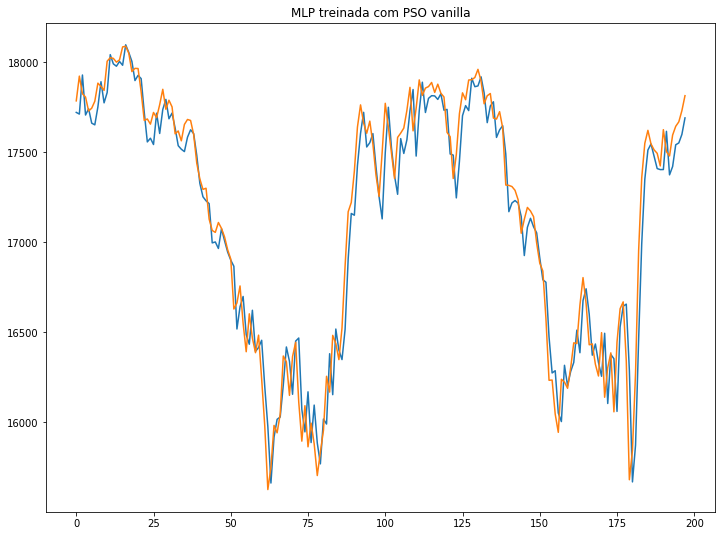

In [49]:
plt.plot(range(y_test.shape[0]),df_test['Close'])
plt.plot(range(y_test.shape[0]),pred)
plt.title('MLP treinada com PSO vanilla');

In [15]:
### Experimento com as as séries do artigo 

## Importar funções para pre-processar os dados
from funcoes import split_sequence, divisao_dados_temporais, normalizar_serie, desnormalizar

In [20]:
## Sunspot
sunspot = pd.read_csv('dados/sunspot.csv')
sunspot = sunspot['valor']
sunspot.head()

0     5.0
1    11.0
2    16.0
3    23.0
4    36.0
Name: valor, dtype: float64

In [17]:
# # Funções essenciais para a organização dos dados
# def normalizar_serie(serie):
#     minimo = np.min(serie)
#     maximo = np.max(serie)
#     y_temp = 2*((serie - minimo) / (maximo - minimo)) - 1
#     y = y_temp / np.sqrt(len(serie))
#     return y

# def desnormalizar(serie_atual, serie_real):
#     minimo = np.min(serie_real)
#     maximo = np.max(serie_real)
    
#     serie = ((serie_atual + 1)/2)*(maximo - minimo) + maximo
    
#     serie = serie * np.sqrt(len(serie_atual))
#     return pd.DataFrame(serie)

# # split a univariate sequence into samples
# def split_sequence(sequence, n_steps_in, n_steps_out):
#     X, y = list(), list()
#     for i in np.arange(len(sequence)):
#         # find the end of this pattern
#         end_ix = i + n_steps_in
#         out_end_ix = end_ix + n_steps_out
#         # check if we are beyond the sequence
#         if out_end_ix > len(sequence):
#             break
#         # gather input and output parts of the pattern
#         seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
#         X.append(seq_x)
#         y.append(seq_y)
#     return np.array(X), np.array(y)

# # Criando os conjuntos de treinamento, validação e teste
# def divisao_dados_temporais(X,y, perc_treino, perc_val = 0):
#     tam_treino = int(perc_treino * len(y))
    
#     if perc_val > 0:        
#         tam_val = int(len(y)*perc_val)
              
#         X_treino = X[0:tam_treino,:]
#         y_treino = y[0:tam_treino,:]
        
#         print("Particao de Treinamento:", 0, tam_treino)
        
#         X_val = X[tam_treino:tam_treino+tam_val,:]
#         y_val = y[tam_treino:tam_treino+tam_val,:]
        
#         print("Particao de Validacao:",tam_treino,tam_treino+tam_val)
        
#         X_teste = X[(tam_treino+tam_val):-1,:]
#         y_teste = y[(tam_treino+tam_val):-1,:]
        
#         print("Particao de Teste:", tam_treino+tam_val, len(y))
        
#         return X_treino, y_treino, X_teste, y_teste, X_val, y_val
        
#     else:
        
#         X_treino = X[0:tam_treino,:]
#         y_treino = y[0:tam_treino,:]

#         X_teste = X[tam_treino:-1,:]
#         y_teste = y[tam_treino:-1,:]

#         return X_treino, y_treino, X_teste, y_teste 


In [21]:
sunspot_norm = normalizar_serie(sunspot)
X, y = split_sequence(sunspot_norm.values, 10, 1)
X_treino, y_treino, X_teste, y_teste, X_val, y_val = divisao_dados_temporais(X, y, perc_treino = 0.6, perc_val = 0.2)
# para avaliar mse
y_teste_ = desnormalizar(y_teste, sunspot)

Particao de Treinamento: 0 167
Particao de Validacao: 167 222
Particao de Teste: 222 279


In [19]:
### Treinar rede neural com Rprop

##### Testar 5 neurônios na camada escondida e 10 execuções
best_model = 0
best_mse = np.inf

for exec in range(10):
    print('Execução ' + str(exec))
    parameters = nn_model_rprop(X_treino.T, y_treino.T, n_h=4, print_cost=True)
    y_pred = predict2(parameters, X_val.T)
    mse_exec = compute_cost2(y_pred,y_val.T, parameters)
    
    if mse_exec < best_mse:
        best_model = parameters 
        best_mse = mse_exec

    print('MSE validação = ' + str(mse_exec))


Execução 0


NameError: name 'X_train' is not defined

In [62]:
# Desnormalizar
y_pred_teste = predict2(best_model, X_teste.T).reshape(-1,1)

# mse de teste
print("mse de teste = ",((y_pred_teste - y_teste)**2).mean())

y_pred_teste = desnormalizar(y_pred_teste, sunspot)

NameError: name 'best_model' is not defined

In [63]:
# Plot
plt.plot(y_teste_, color = 'blue')
plt.plot(y_pred_teste, color = 'coral');

NameError: name 'y_pred_teste' is not defined

In [64]:
### Treinar rede neural com backprop

##### Testar 4 neurônios na camada escondida e 10000 epocas com 30 execuções
best_model = 0
best_mse = np.inf

neuronios = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

for i in neuronios:
    print('Neurônios: ', i)

    for exec in np.arange(1):
        print('Execução ' + str(exec))
        parameters = nn_model2(X_treino.T, y_treino.T, n_h = i, print_cost = True)
        y_pred = predict2(parameters, X_val.T)
        mse_exec = compute_cost2(y_pred,y_val.T, parameters)
    
        if mse_exec < best_mse:
            best_model = parameters 
            best_mse = mse_exec
            print('Melhor MSE: ', best_mse)
            qtd_neuronios = i

    
    print('MSE validação = ' + str(mse_exec))

Neurônios:  2
Execução 0
Custo após iteração 0: 0.001397
Custo após iteração 1000: 0.000493
Custo após iteração 2000: 0.000489
Custo após iteração 3000: 0.000468
Custo após iteração 4000: 0.000379
Custo após iteração 5000: 0.000225
Custo após iteração 6000: 0.000165
Custo após iteração 7000: 0.000154
Custo após iteração 8000: 0.000144
Custo após iteração 9000: 0.000217
Melhor MSE:  6.406818895829063e-05
MSE validação = 6.406818895829063e-05
Neurônios:  3
Execução 0
Custo após iteração 0: 0.001394
Custo após iteração 1000: 0.000490
Custo após iteração 2000: 0.000471
Custo após iteração 3000: 0.000390
Custo após iteração 4000: 0.000235
Custo após iteração 5000: 0.000168
Custo após iteração 6000: 0.000156
Custo após iteração 7000: 0.000146
Custo após iteração 8000: 0.000138
Custo após iteração 9000: 0.000137
MSE validação = 7.458064290918002e-05
Neurônios:  4
Execução 0
Custo após iteração 0: 0.001395
Custo após iteração 1000: 0.000491
Custo após iteração 2000: 0.000479
Custo após iteraçã

In [65]:
# melhor configuração
print('NN com {} neurônios na camada escondida'.format(qtd_neuronios))

NN com 12 neurônios na camada escondida


In [66]:
# Desnormalizar
y_pred_teste = predict2(best_model, X_teste.T).reshape(-1,1)

# mse de teste
print("mse de teste = ",((y_pred_teste - y_teste)**2).mean())

y_pred_teste = desnormalizar(y_pred_teste, sunspot)

mse de teste =  0.00023125426328121236


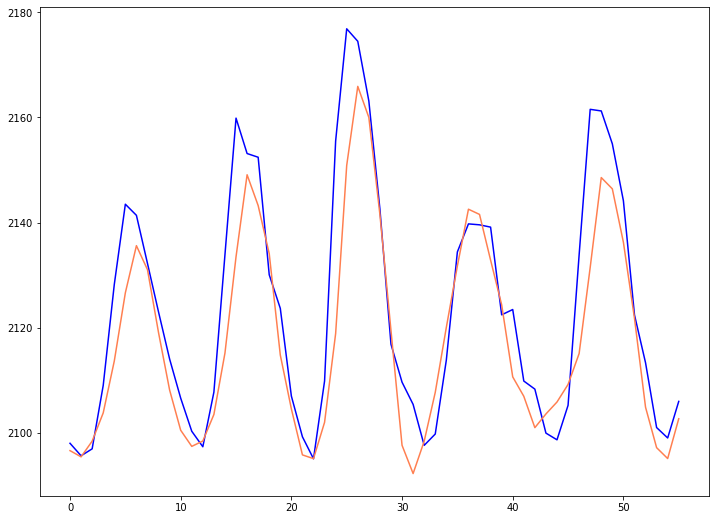

In [67]:
# Plot
plt.plot(y_teste_, color = 'blue')
plt.plot(y_pred_teste, color = 'coral');

In [174]:
### Treinar rede neural com pso

##### Testar 5 neurônios na camada escondida
best_model = 0
best_mse = np.inf

neuronios = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
for i in neuronios:
    print('Neurônios: ', i)

    for exec in np.arange(1):

        print('Execução ' + str(exec))
        parameters,_ = nn_model_pso_todos(X_treino.T, y_treino.T, n_h = i, print_cost = True)
    
        y_pred = predict2(parameters, X_val.T)
        mse_exec = compute_cost2(y_pred, y_val.T, parameters)
    
        if mse_exec < best_mse:
            best_model = parameters 
            best_mse = mse_exec
            print('Melhor MSE: ', best_mse)
            qtd_neuronios = i

        print('MSE validação = ' + str(mse_exec))

Neurônios:  2
Execução 0
Custo gbest inicio PSO =  0.00139740844936223
gbest 0
Erro de treinamento após otimizar parâmetros = 0.00139740844936223
Custo após iteração 0: 0.001397
Melhor MSE:  0.001531155141217242
MSE validação = 0.001531155141217242
Neurônios:  3
Execução 0
Custo gbest inicio PSO =  0.0013941900707588886
gbest 0
Erro de treinamento após otimizar parâmetros = 0.0013941900707588886
Custo após iteração 0: 0.001394
Melhor MSE:  0.0015273144797414654
MSE validação = 0.0015273144797414654
Neurônios:  4
Execução 0
Custo gbest inicio PSO =  0.0013950317034092318
gbest 0
Erro de treinamento após otimizar parâmetros = 0.0013950317034092318
Custo após iteração 0: 0.001395
MSE validação = 0.001528210388583215
Neurônios:  5
Execução 0
Custo gbest inicio PSO =  0.0013994740673681002
gbest 0
Erro de treinamento após otimizar parâmetros = 0.0013994740673681002
Custo após iteração 0: 0.001399
MSE validação = 0.0015336172346845766
Neurônios:  6
Execução 0
Custo gbest inicio PSO =  0.0013

KeyboardInterrupt: 

In [217]:
print('NN com {} neurônios na camada escondida'.format(qtd_neuronios))

NN com 3 neurônios na camada escondida


In [218]:
# Desnormalizar
y_pred_teste = predict2(best_model, X_teste.T).reshape(-1,1)

# mse de teste
print("mse de teste = ",((y_pred_teste - y_teste)**2).mean())

y_pred_teste = desnormalizar(y_pred_teste, sunspot)

mse de teste =  0.001270267975018949


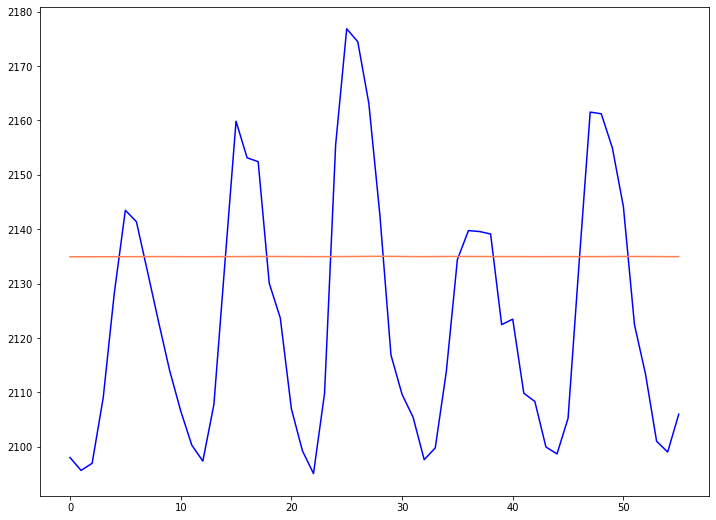

In [219]:
# Plot
plt.plot(y_teste_, color = 'blue')
plt.plot(y_pred_teste, color = 'coral');